In [1]:
%run ./'01 load.ipynb'

Last data for germany: 2020-03-24 18:16:45


In [2]:
country = 'Germany'

In [3]:
df = df[df['country'] == country]

In [4]:
df['growth'] = df['confirmed'].diff().fillna(0)

In [5]:
# Newest Data
df.tail(5)

,index,country,confirmed,deaths,recovered,active,date,date_string,growth
3964,3902,Germany,19848,67,0,0,2020-03-20 23:59:59,20. Mar,"4,528"
3965,3903,Germany,22213,84,0,0,2020-03-21 23:59:59,21. Mar,"2,365"
3966,3904,Germany,24873,94,0,0,2020-03-22 23:59:59,22. Mar,"2,660"
3967,3905,Germany,29056,123,0,0,2020-03-23 23:59:59,23. Mar,"4,183"
3968,7,Germany,32781,156,"3,133","29,492",2020-03-24 18:16:45,24. Mar,"3,725"


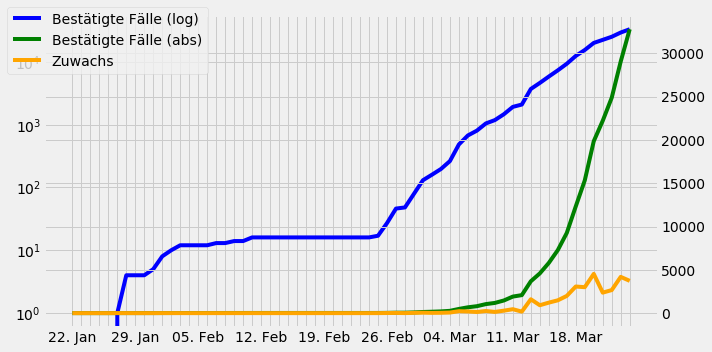

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(True)
ax1.set_yscale('log')
ax1.plot(df['date_string'], df['confirmed'], color = 'blue')
ax2 = ax1.twinx()
ax2.plot(df['date_string'], df['confirmed'], color = 'green')
ax2.plot(df['date_string'], df['growth'], color = 'orange')
fig.legend(['Bestätigte Fälle (log)', 'Bestätigte Fälle (abs)', 'Zuwachs'], loc='upper left')
labels = ax1.xaxis.get_ticklabels()
for label in labels:
    label.set_visible(False)
for label in labels[::7]:
    label.set_visible(True)
fig.tight_layout()
fig.show()